In [8]:
import librosa
import numpy as np
from tqdm import tqdm
import pandas as pd
import numpy as np
import os

def freq(data, sample_rate,start_time=0,end_time=5000):
    start_point = int(sample_rate * start_time / 1000)
    end_point = int(sample_rate * end_time / 1000)-1
    length = (end_time - start_time) / 1000
    counter = 0
    for i in range(start_point, end_point):
        if data[i] < 0 and data[i+1] > 0:
            counter += 1
    return counter/length

In [9]:
train_wav_dir = 'train/train/'
train_label = 'train/meta_train.csv'

In [10]:
files = os.listdir(train_wav_dir)
files.sort() #重要
freq_list = []
for f in tqdm(files[:]):
    try:
        data ,sample_rate = librosa.load(train_wav_dir+f,sr=16000)
        data_freq = freq(data,sample_rate)
        freq_list.append(data_freq)
    except:
        print(f)

 87%|████████▋ | 1046/1200 [05:15<00:37,  4.16it/s]

train_01046.wav


100%|██████████| 1200/1200 [06:02<00:00,  3.31it/s]


In [11]:
df = pd.read_csv(train_label)[:]
df = df[df.Filename != 'train_01046']
print(df.shape)
df['audio_freq'] = freq_list
df

(1199, 3)


,Filename,Label,Remark,audio_freq
0,train_00001,0,Barking,113.8
1,train_00002,0,Barking,1067.8
2,train_00003,0,Barking,644.4
3,train_00004,0,Barking,1257.0
4,train_00005,0,Barking,753.0
...,...,...,...,...
1195,train_01196,5,Dishes,1651.2
1196,train_01197,5,Dishes,1237.8
1197,train_01198,5,Dishes,1484.2
1198,train_01199,5,Dishes,1233.2


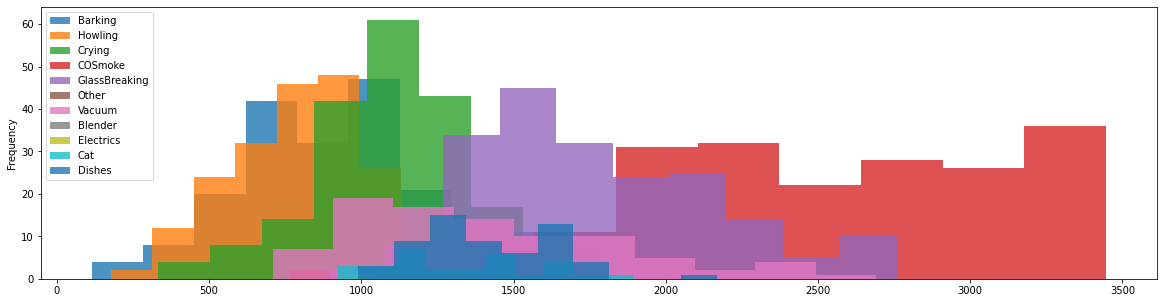

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
for r in df.Remark.unique():
    df[df.Remark==r]['audio_freq'].plot(kind='hist',label=r,alpha=0.8)
plt.legend()
plt.show()

In [47]:
for r in df.Remark.unique():
    r_max = df[df.Remark==r].audio_freq.max()
    r_min = df[df.Remark==r].audio_freq.min()
    print(r,r_min,r_max)

Barking 113.8 1801.4
Howling 176.8 1538.4
Crying 332.6 2044.2
COSmoke 763.4 3446.6
GlassBreaking 895.4 2758.2
Other 2111.2 2111.2
Vacuum 708.6 2691.0
Blender 1096.0 1824.0
Electrics 973.8 1748.0
Cat 923.4 1892.0
Dishes 990.4 2167.8


In [48]:
def convertprob(prob,freq):
    if freq > 2050:
        prob[:3] = 0 #狗不可能發出超過2045hz的聲音
    if freq > 3000:
        prob[3] = 1.0 #只有Cosmoke可能發出超過3000hz
    return prob

In [49]:
convertprob(np.random.uniform(0,1,size=6),2500)

array([0.        , 0.        , 0.        , 0.85286853, 0.40340799,
       0.82604364])

In [50]:
convertprob(np.random.uniform(0,1,size=6),3001)

array([0.        , 0.        , 0.        , 1.        , 0.90689103,
       0.64687512])